In [4]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/edges_cc.csv")
print(df.shape)
nandf = df[df.isna().any(axis=1)]
print(nandf.shape)
df = df.dropna()
print(df.shape)
df = df[df['src'].apply(lambda x: len(x) == 8)]
print(df.shape)
df = df[df['dst'].apply(lambda x: len(x) == 8)]
print(df.shape)
graph = nx.from_pandas_edgelist(df, source='src', target='dst')

(906214, 2)
(5331, 2)
(900883, 2)
(900883, 2)
(900881, 2)


In [3]:
# graph = nx.read_edgelist("data/edgelist.csv", nodetype=str, delimiter=",")
# graph
j = 0
for i in range(10):
    j += i
    print(j)

0
1
3
6
10
15
21
28
36
45


In [4]:
graph.number_of_nodes()

48779

In [5]:
graph.number_of_edges()

311661

In [6]:
# avg_shortest_path = nx.average_shortest_path_length(graph)
# print(avg_shortest_path)

In [7]:
ccs = nx.connected_components(graph)
ccs = list(ccs)
nccs = len(ccs)
print("num ccs = ", nccs)
print("average ccs size = ", graph.number_of_nodes() / nccs)

num ccs =  253
average ccs size =  192.80237154150197


In [9]:
giant = max([graph.subgraph(c).copy() for c in ccs], key=len)
giant.remove_edges_from(nx.selfloop_edges(giant))
print(giant.number_of_nodes())
print(giant.number_of_edges())
nx.write_edgelist(giant, "data/giant.csv", data=False)

48272
310742


In [8]:
# avg_shortest_path = nx.average_shortest_path_length(giant)
# print(avg_shortest_path)

Counter({1: 16147, 2: 7919, 3: 4679, 4: 3060, 5: 2295, 6: 1669, 7: 1267, 8: 1104, 9: 863, 10: 697, 11: 612, 12: 531, 13: 453, 14: 410, 15: 355, 17: 324, 16: 324, 21: 247, 18: 247, 19: 243, 20: 212, 23: 175, 22: 175, 24: 170, 27: 136, 25: 135, 26: 127, 28: 124, 30: 111, 29: 110, 32: 93, 33: 90, 31: 90, 36: 86, 34: 84, 35: 82, 38: 80, 37: 78, 39: 63, 40: 61, 42: 58, 44: 57, 41: 56, 52: 52, 43: 51, 47: 50, 45: 50, 54: 49, 48: 47, 53: 42, 46: 39, 61: 35, 59: 35, 55: 35, 49: 35, 57: 34, 50: 32, 51: 29, 60: 27, 69: 26, 63: 26, 62: 26, 56: 26, 75: 25, 67: 25, 58: 25, 68: 24, 66: 24, 65: 24, 86: 22, 76: 22, 74: 22, 73: 22, 77: 21, 100: 20, 72: 20, 71: 20, 64: 20, 88: 19, 87: 19, 82: 19, 90: 18, 84: 17, 104: 16, 95: 16, 92: 16, 81: 16, 80: 16, 78: 16, 70: 16, 83: 15, 94: 14, 91: 14, 89: 14, 85: 14, 79: 14, 142: 13, 128: 13, 109: 13, 112: 12, 102: 12, 97: 12, 114: 11, 113: 11, 101: 11, 93: 11, 126: 10, 120: 10, 167: 9, 137: 9, 135: 9, 130: 9, 122: 9, 110: 9, 185: 8, 154: 8, 150: 8, 138: 8, 121: 

Text(0.5, 0, 'Degree')

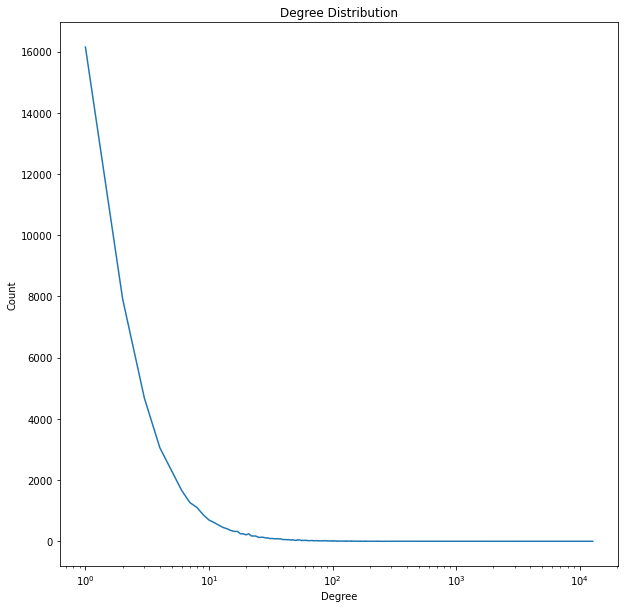

In [41]:
import collections
import matplotlib.pyplot as plt
degree_sequence = sorted([d for n, d in giant.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
print(degreeCount)
print(max(deg))
print(max(cnt))

fig, ax = plt.subplots(figsize=(10,10))
plt.xscale("log")
plt.plot(deg, cnt)  # , width=2.0, color="b")
# ax.set_xticklabels([0, 1000, 2000, 3000, 4000])
plt.title("Degree Distribution")
plt.ylabel("Count")
plt.xlabel("Degree")
# ax.set_xticks([d + 0.4 for d in deg])
# # ax.set_xticklabels(deg)
# plt.show()

In [11]:
v = list(giant)[0]
v

'C5203676'

In [12]:
# sps = nx.shortest_path_length(giant, source=v)
# maxkey = max(sps, key=sps.get)
# print(maxkey, sps[maxkey])

In [13]:
# vertices = list(giant)
# # for v1 in range(giant.number_of_nodes()):
# with open("data/shortest_paths.csv", mode="w") as spsfile:
#     spsfile.write("src,dst,length\n")
#     for v1 in range(giant.number_of_nodes()):
# #     for v1 in range(5):
#         vid = vertices[v1]
#         sps = nx.shortest_path_length(giant, source=vid)
#         for key, value in sps.items():
#             if value <= 1:  # only store non-neighbors and non-self
#                 continue
#             spsfile.write("{0},{1},{2}\n".format(vid, key, value))
#         maxkey = max(sps, key=sps.get)
#         if v1 % 1000 == 0:
#             print("{0} / {1}".format(v1, giant.number_of_nodes()))
#     #     print(maxkey, sps[maxkey])

In [42]:
print(df.shape)
print(df[df['src'].apply(lambda x: len(x) == 8)].shape)
print(df[df['dst'].apply(lambda x: len(x) == 8)].shape)

(900881, 2)
(900881, 2)
(900881, 2)


In [15]:
# DO NOT USE - old implementation. Commented out so as to not overwrite previous graph
# import random

# missing_graph = nx.Graph()

# percent_edges_to_remove = 0.2  # remove 20% of edges
# num_edges_to_remove = int(0.2 * giant.number_of_edges())
# modified_giant = giant.copy()
# num_removed = 0
# while num_removed < num_edges_to_remove:
# # for edge in range(num_edges_to_remove):
#     edges = list(modified_giant.edges())
#     u, v = random.choice(edges)
#     if modified_giant.degree[u] < 2 or modified_giant.degree[v] < 2:
#         continue
#     modified_giant.remove_edge(u, v)
#     missing_graph.add_edge(u, v)
#     num_removed += 1

# nx.write_edgelist(modified_giant, "data/modified_giant.csv", data=False)
# nx.write_edgelist(missing_graph, "data/missing_edges.csv", data=False)

KeyboardInterrupt: 

In [27]:
# DO NOT USE - old implementation. Commented out so as to not overwrite previous graph

# import random

# missing_graph = nx.Graph()

# percent_edges_to_remove = 0.2  # remove 20% of edges
# num_edges_to_remove = int(percent_edges_to_remove * giant.number_of_edges())
# modified_giant = giant.copy()
# num_removed = 0
# high_degree_vertices = list()
# for vertex in modified_giant.nodes:
#     if modified_giant.degree[vertex] > 1:
#         high_degree_vertices.append(vertex)
# # if len(high_degree_vertices) < num_edges_to_remove:
# #     print("high_degree_vertices = ", len(high_degree_vertices))
# #     print("num edges to remove = ", num_edges_to_remove)
# #     raise ValueError

# while num_removed < num_edges_to_remove:
#     src = random.choice(high_degree_vertices)
#     dsts = list()
#     for neighbor in modified_giant.neighbors(src):
#         if modified_giant.degree[neighbor] > 1:
#             dsts.append(neighbor)
#     if len(dsts) == 0:
#         high_degree_vertices.remove(src)
#         continue
#     dst = random.choice(dsts)
#     modified_giant.remove_edge(src, dst)
#     missing_graph.add_edge(src, dst)
#     num_removed += 1
#     if len(high_degree_vertices) < 2:
#         print("Ran out of high degree vertices")
#         print("Number of removed edges = ", missing_graph.number_of_edges())
#         break
    
# #     edges = list(modified_giant.edges())
# #     u, v = random.choice(edges)
# #     if modified_giant.degree[u] < 2 or modified_giant.degree[v] < 2:
# #         continue
# #     modified_giant.remove_edge(u, v)
# #     missing_graph.add_edge(u, v)
# #     num_removed += 1

# nx.write_edgelist(modified_giant, "data/modified_giant.csv", data=False)
# nx.write_edgelist(missing_graph, "data/missing_edges.csv", data=False)

In [43]:
# Commented out so as to not overwrite previous graph
# import random

# missing_graph = nx.Graph()

# percent_edges_to_remove = 0.2  # remove 20% of edges
# num_edges_to_remove = int(percent_edges_to_remove * giant.number_of_edges())
# modified_giant = giant.copy()
# num_removed = 0

# mst = nx.minimum_spanning_tree(giant)
# possible_edges = nx.difference(giant, mst)  # this graph contains edges that can safely be removed
# print("num edges to remove = ", num_edges_to_remove)
# print("num possible edges = ", possible_edges.number_of_edges())

# # for i in range(num_edges_to_remove):
# edges = list(possible_edges.edges())
# edges_to_remove = random.sample(edges, k=num_edges_to_remove)
# print("got edges to be removed")
# for u, v in edges_to_remove:
#     modified_giant.remove_edge(u, v)
# #     possible_edges.remove_edge(u, v)
#     missing_graph.add_edge(u, v)
# #     num_removed += 1

# nx.write_edgelist(modified_giant, "data/modified_giant.csv", data=False)
# nx.write_edgelist(missing_graph, "data/missing_edges.csv", data=False)

num edges to remove =  62148
num possible edges =  262471
got edges to be removed


48272 248594
19684 62148
min =  2  max =  6


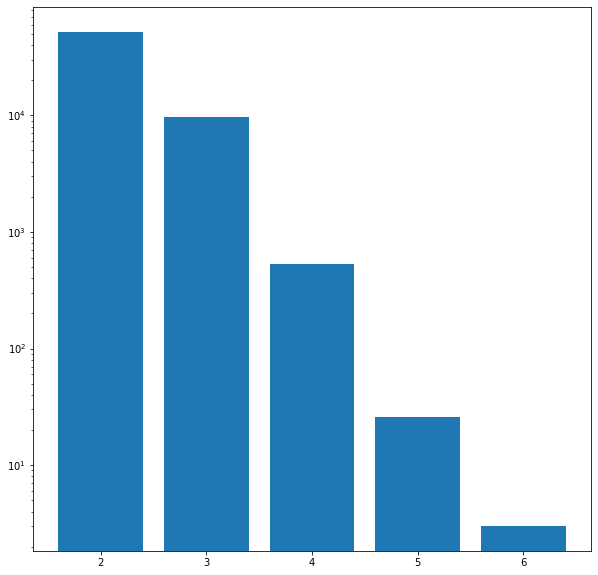

In [5]:
modified_giant = nx.read_edgelist("data/modified_giant.csv")
missing_graph = nx.read_edgelist("data/missing_edges.csv")
from collections import Counter
print(modified_giant.number_of_nodes(), modified_giant.number_of_edges())
print(missing_graph.number_of_nodes(), missing_graph.number_of_edges())
sssps = list()
for src, dst in missing_graph.edges:
    path = nx.shortest_path(modified_giant, source=src, target=dst)
    sssps.append((src, dst, len(path) - 1))  # num edges = num vertices - 1 (a -> b -> c == 2 edges but 3 vertices)
pathlengths = Counter([x[2] for x in sssps])
# fig, ax = plt.subplots(figsize=(10,10))
# plt.xscale("log")
# plt.plot(deg, cnt)  # , width=2.0, color="b")
# # ax.set_xticklabels([0, 1000, 2000, 3000, 4000])
# plt.title("Path Lengths")
# plt.ylabel("Count")
# plt.xlabel("Path Length")
# print(pathlengths[:50])
fig, ax = plt.subplots(figsize=(10,10))
plt.yscale("log")
plt.bar(pathlengths.keys(), pathlengths.values())  # , bins=20, histtype='stepfilled', log=False)
print("min = ", min(pathlengths), " max = ", max(pathlengths))

In [9]:
1 - (pathlengths[2] / missing_graph.number_of_edges())

0.1644139795327283

In [ ]:
# why is deployment on supercomputers important?
# what we deployed?
# evaluation criteria